<a href="https://colab.research.google.com/github/RaimeeShukla/ML_Lab/blob/main/ML_Lab4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 4

NAME: RAIMEE MADHURI SHUKLA

REGISTERATION NUMBER: BL.EN.U4AIE23125

SECTION: AIE-E

Question 1

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

Saving CatsAndDogs.csv to CatsAndDogs.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

X=df[['Height','Weight','Length']]
y=df['Animal']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)

train_cm=confusion_matrix(y_train, y_train_pred)
test_cm=confusion_matrix(y_test, y_test_pred)

train_report=classification_report(y_train, y_train_pred)
test_report=classification_report(y_test, y_test_pred)

print("Confusion Matrix - Training Data:\n",train_cm)
print("\nConfusion Matrix - Test Data:\n",test_cm)
print("\nClassification Report - Training Data:\n",train_report)
print("\nClassification Report - Test Data:\n",test_report)

Confusion Matrix - Training Data:
 [[12  3]
 [ 2 18]]

Confusion Matrix - Test Data:
 [[4 1]
 [1 3]]

Classification Report - Training Data:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      0.90      0.88        20

    accuracy                           0.86        35
   macro avg       0.86      0.85      0.85        35
weighted avg       0.86      0.86      0.86        35


Classification Report - Test Data:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



Question 2

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_excel(file_name)

Saving Purchase Data.xlsx to Purchase Data.xlsx


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

A=df.iloc[:,1:-1]
C=df.iloc[:,-1]
A=A.to_numpy()
C=C.to_numpy().reshape(-1,1)

pinvA=np.linalg.pinv(A)
X=np.dot(pinvA,C)
C_pred=np.dot(A, X)

mse=mean_squared_error(C,C_pred)
rmse=np.sqrt(mse)
map_error=np.mean(np.abs((C-C_pred)/C))*100
r2=r2_score(C,C_pred)

print("Cost of each product:\n",X)
print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {map_error}%")
print(f"R² Score: {r2}")

Cost of each product:
 [[ 1.]
 [55.]
 [18.]]

Performance Metrics:
Mean Squared Error (MSE): 3.2311742677852644e-27
Root Mean Squared Error (RMSE): 5.684341886080802e-14
Mean Absolute Percentage Error (MAPE): 2.0176081332685152e-14%
R² Score: 1.0


Question 3

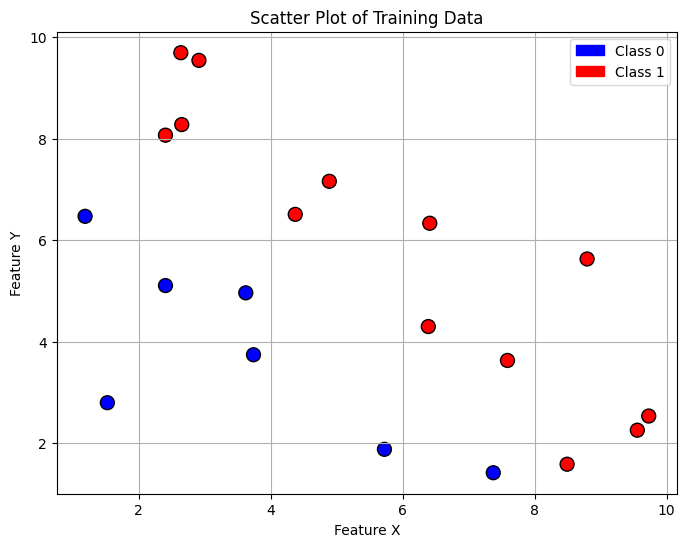

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(42)
X=np.random.uniform(1,10,20)
Y=np.random.uniform(1,10,20)

classes=(X+Y>10).astype(int)
colors=np.array(['blue','red'])[classes]

plt.figure(figsize=(8,6))
plt.scatter(X,Y,c=colors,edgecolors='black',s=100)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data")
plt.grid(True)

blue=mpatches.Patch(color='blue',label='Class 0')
red=mpatches.Patch(color='red',label='Class 1')
plt.legend(handles=[blue,red])
plt.show()

Question 4

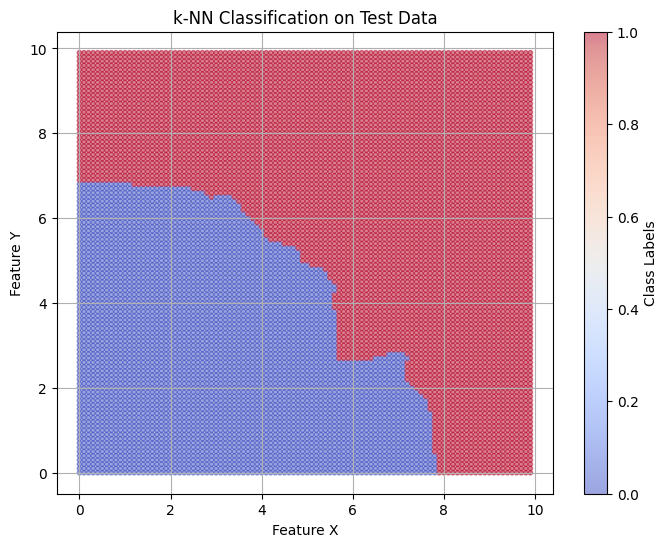

In [ ]:
np.random.seed(42)
X_train=np.random.uniform(1,10,20)
Y_train=np.random.uniform(1,10,20)

classes_train=(X_train+Y_train>10).astype(int)
train_data=np.column_stack((X_train,Y_train))

X_test=np.arange(0,10,0.1)
Y_test=np.arange(0,10,0.1)
X_test,Y_test = np.meshgrid(X_test,Y_test)
test_data=np.c_[X_test.ravel(),Y_test.ravel()]

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data,classes_train)

predicted_classes=knn.predict(test_data)

plt.figure(figsize=(8,6))
plt.scatter(test_data[:,0],test_data[:,1],c=predicted_classes,cmap='coolwarm',alpha=0.5,s=10)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("k-NN Classification on Test Data")
plt.colorbar(label="Class Labels")
plt.grid(True)
plt.show()

Question 5

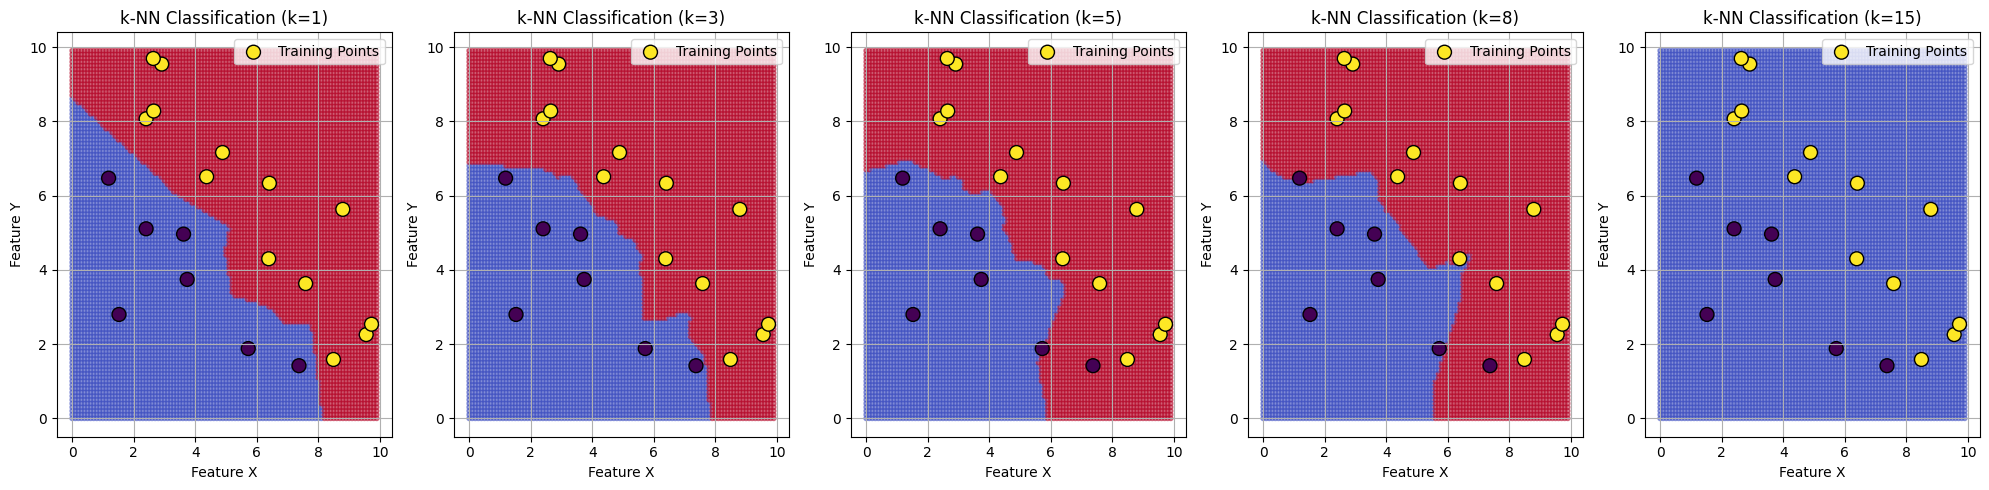

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train=np.random.uniform(1,10,20)
Y_train=np.random.uniform(1,10,20)

classes_train=(X_train+Y_train>10).astype(int)
train_data=np.column_stack((X_train,Y_train))

X_test=np.arange(0,10,0.1)
Y_test=np.arange(0,10,0.1)
X_test,Y_test=np.meshgrid(X_test,Y_test)
test_data=np.c_[X_test.ravel(),Y_test.ravel()]

k_values=[1,3,5,8,15]
fig,axes=plt.subplots(1,len(k_values),figsize=(20,5))

for i,k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data,classes_train)
    predicted_classes=knn.predict(test_data)

    ax=axes[i]
    ax.scatter(test_data[:,0],test_data[:,1],c=predicted_classes,cmap='coolwarm',alpha=0.5,s=10)
    ax.scatter(X_train,Y_train,c=classes_train,edgecolors='black',marker='o',s=100,label="Training Points")
    ax.set_xlabel("Feature X")
    ax.set_ylabel("Feature Y")
    ax.set_title(f"k-NN Classification (k={k})")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Question 6

In [2]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

Saving CatsAndDogs.csv to CatsAndDogs.csv


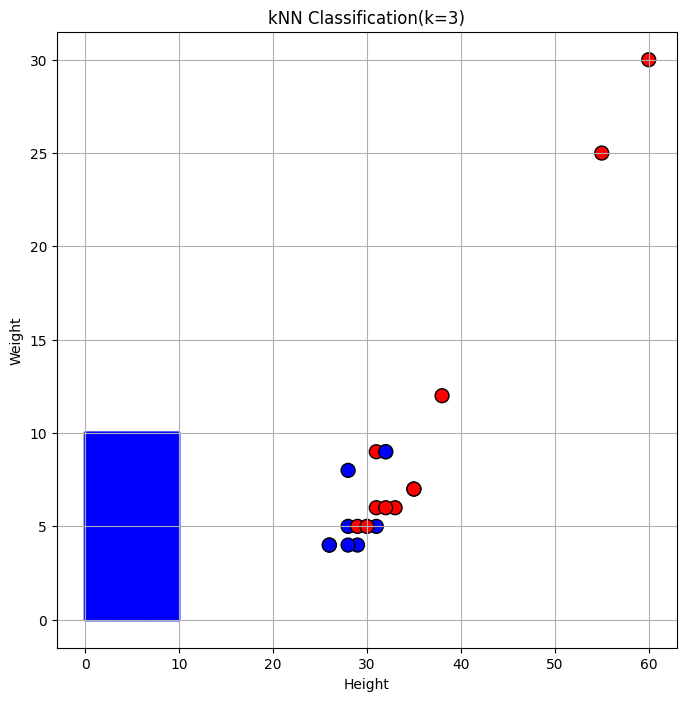

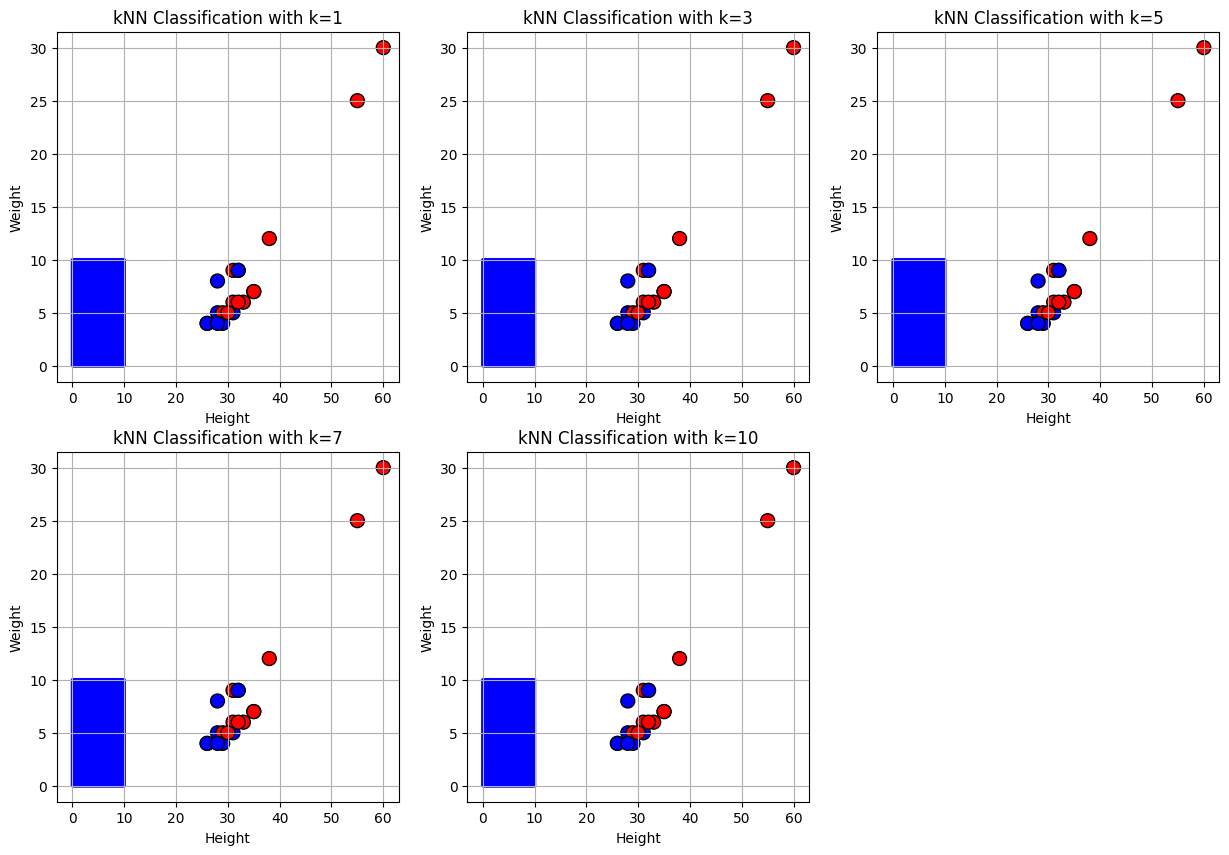

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_feature="Height"
Y_feature="Weight"
class_column="Animal"

X=df[[X_feature,Y_feature]]
y=df[class_column]

df=df[df[class_column].isin([0,1])]

train_data=df.sample(n=20,random_state=42)
X_train=train_data[[X_feature,Y_feature]].values
y_train=train_data[class_column].values

X_test,Y_test=np.meshgrid(np.arange(0,10.1,0.1), np.arange(0,10.1,0.1))
test_data=np.column_stack((X_test.ravel(),Y_test.ravel()))

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

predicted_classes=knn.predict(test_data)

colors=np.array(["blue","red"])
test_colors=[colors[c] for c in predicted_classes]

plt.figure(figsize=(8,8))
plt.scatter(test_data[:,0],test_data[:,1],c=test_colors,marker='.',alpha=0.5,s=10)
plt.scatter(X_train[:,0],X_train[:,1],c=[colors[c] for c in y_train],edgecolors='black',s=100)
plt.xlabel(X_feature)
plt.ylabel(Y_feature)
plt.title("kNN Classification(k=3)")
plt.grid(True)
plt.show()

k_values=[1,3,5,7,10]

plt.figure(figsize=(15,10))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predicted_classes=knn.predict(test_data)

    test_colors=[colors[c] for c in predicted_classes]

    plt.subplot(2,3,i+1)
    plt.scatter(test_data[:,0],test_data[:,1],c=test_colors,marker='.',alpha=0.5,s=10)
    plt.scatter(X_train[:,0],X_train[:,1],c=[colors[c] for c in y_train],edgecolors='black',s=100)
    plt.xlabel(X_feature)
    plt.ylabel(Y_feature)
    plt.title(f"kNN Classification with k={k}")
    plt.grid(True)

plt.show()

Question 7

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score

X_feature="Height"
Y_feature="Weight"
class_column="Animal"

X=df[[X_feature,Y_feature]]
y=df[class_column]

df=df[df[class_column].isin([0,1])]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

param_grid={'n_neighbors': np.arange(1,20,2)}

grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

random_search=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_grid,n_iter=5,cv=5,scoring='accuracy',random_state=42)
random_search.fit(X_train,y_train)

best_k_grid=grid_search.best_params_['n_neighbors']
best_k_random=random_search.best_params_['n_neighbors']

print(f"Best k from GridSearchCV: {best_k_grid}")
print(f"Best k from RandomizedSearchCV: {best_k_random}")

best_knn=KNeighborsClassifier(n_neighbors=best_k_grid)
best_knn.fit(X_train,y_train)

y_pred=best_knn.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy with best k={best_k_grid}: {accuracy:.2f}")


Best k from GridSearchCV: 13
Best k from RandomizedSearchCV: 17
Accuracy with best k=13: 0.56
